# <center>  Manipulation d’histogramme - Egalisation <center>

In [1]:
!pip install opencv-python

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

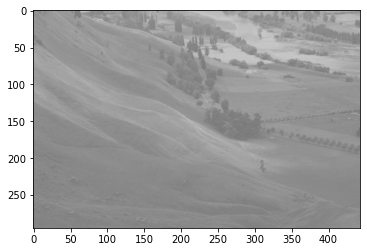

In [13]:
path = r"C:\Users\Dell\TP Traitement Image\vallee.png"
# Lire l'image en niveaux de gris
img = cv.imread(path, cv.IMREAD_GRAYSCALE)

# Afficher l'image en niveaux de gris avec l'échelle de valeurs de 0 à 255
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

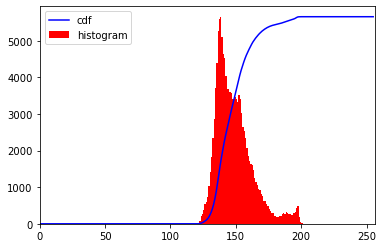

In [9]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
#cdf= Cumulative Distribution Function of an image
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Observations:
- L'histogramme montre la distribution des niveaux de gris dans l'image.
- La fonction de distribution cumulative (CDF) montre l'accumulation de la distribution des niveaux de gris.
- Lorsque la CDF s'approche de 1, cela signifie que la majorité des pixels de l'image ont été atteints.
- Un écart important entre les valeurs de CDF indique un contraste élevé dans l'image.
- Un histogramme large indique une gamme étendue de niveaux de gris, ce qui peut correspondre à un bon contraste.

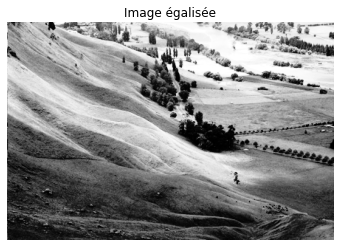

In [19]:
# Égaliser l'histogramme de l'image
equ = cv.equalizeHist(img)

# Afficher l'image égalisée
plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.title('Image égalisée')
plt.show()


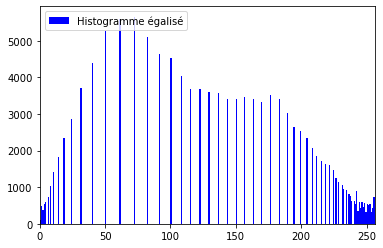

Observations:
- Contrairement à l'histogramme original, les valeurs d'intensité des pixels vont maintenant de 0 à 255 sur l'axe X.
- L'histogramme original a été étiré jusqu'aux extrémités.
- La ligne de la fonction de distribution cumulative (CDF) est maintenant linéaire, contrairement à la courbe originale.


In [20]:
# Afficher l'histogramme de l'image égalisée
plt.hist(equ.flatten(), 256, [0, 256], color='b')
plt.xlim([0, 256])
plt.legend(['Histogramme égalisé'], loc='upper left')
plt.show()

# Observations
print("Observations:")
print("- Contrairement à l'histogramme original, les valeurs d'intensité des pixels vont maintenant de 0 à 255 sur l'axe X.")
print("- L'histogramme original a été étiré jusqu'aux extrémités.")
print("- La ligne de la fonction de distribution cumulative (CDF) est maintenant linéaire, contrairement à la courbe originale.")

## Adaptive Histogram Equalization (AHE)

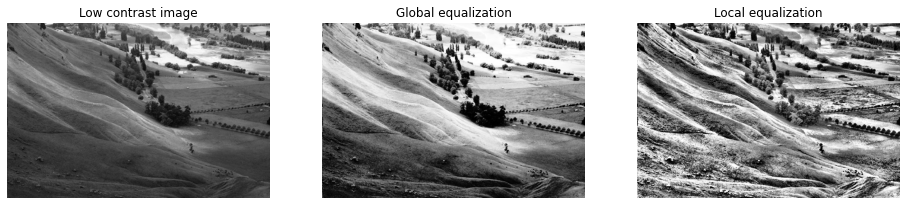

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread 
# Original image
path = r"C:\Users\Dell\TP Traitement Image\vallee.png"
img = img_as_ubyte(imread(path, as_gray=True))
# Global equalize
img_global = exposure.equalize_hist(img)
# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()

Text(0, 0.5, 'Fréquence')

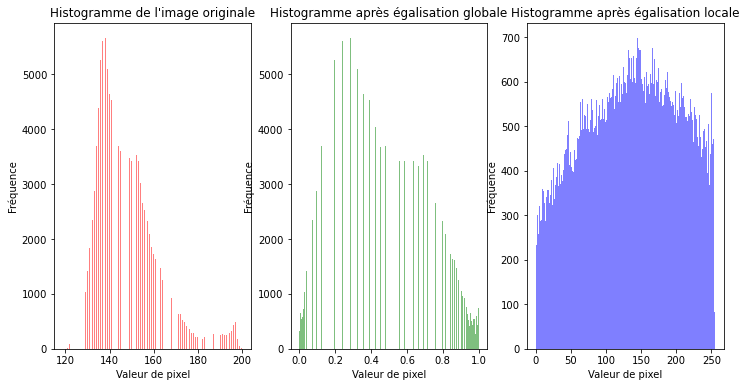

In [23]:
# Affichage des histogrammes
plt.figure(figsize=(12, 6))

# Histogramme de l'image originale
plt.subplot(1, 3, 1)
plt.hist(img.flatten(), bins=256, color='r', alpha=0.5)
plt.title('Histogramme de l\'image originale')
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')

# Histogramme de l'image après égalisation globale
plt.subplot(1, 3, 2)
plt.hist(img_global.flatten(), bins=256, color='g', alpha=0.5)
plt.title('Histogramme après égalisation globale')
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')

# Histogramme de l'image après égalisation locale
plt.subplot(1, 3, 3)
plt.hist(img_local.flatten(), bins=256, color='b', alpha=0.5)
plt.title('Histogramme après égalisation locale')
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')


## Contrastive Limited Adaptive Equalization

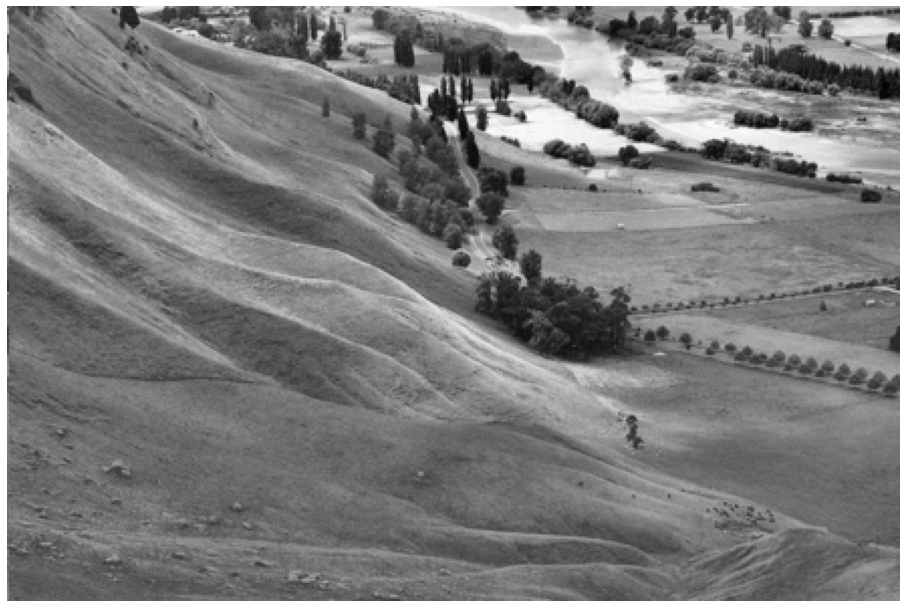

In [25]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Charger l'image de test
path =r"C:\Users\Dell\TP Traitement Image\vallee.png"
img = cv.imread(path)

# Convertir l'image en niveaux de gris
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Créer un objet CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Appliquer CLAHE à l'image en niveaux de gris
cl1 = clahe.apply(grayimg)

# Afficher l'image égalisée avec CLAHE
plt.imshow(cl1, cmap="gray")
plt.axis('off')  # Masquer les axes
plt.show()


Text(0.5, 1.0, "Histogramme de l'image égalisée avec CLAHE")

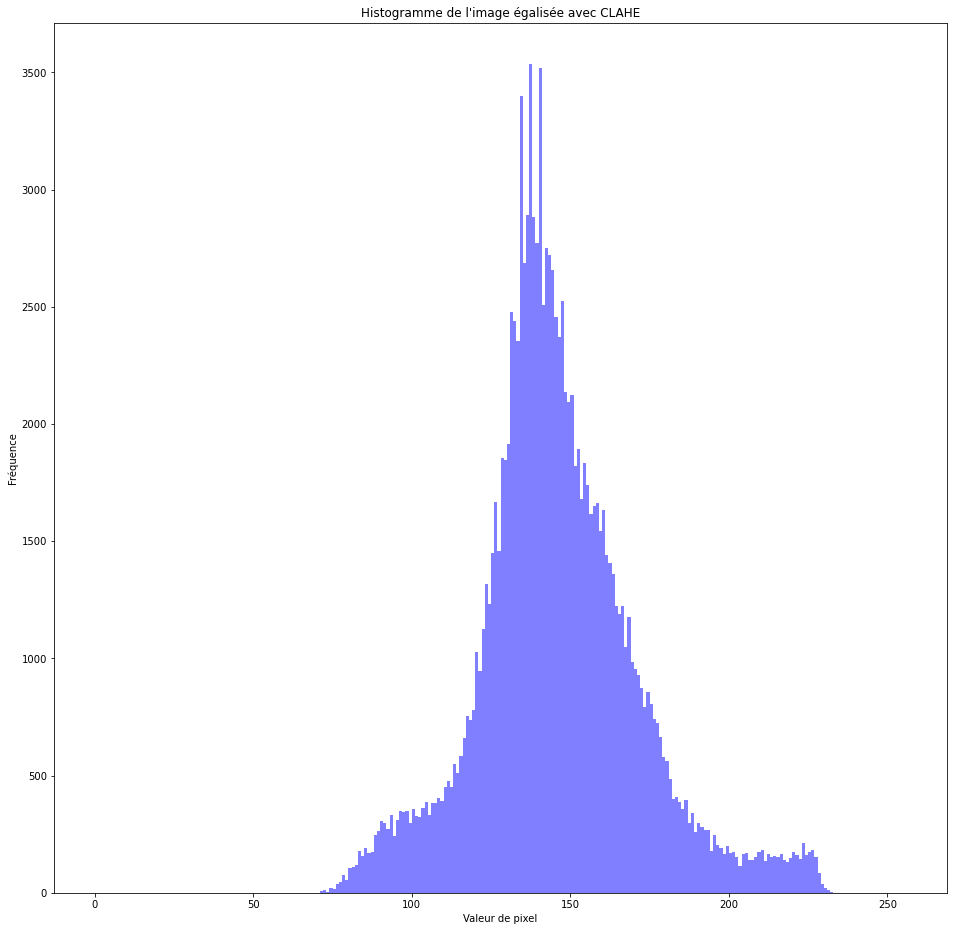

In [26]:
# Calculer et afficher l'histogramme de l'image égalisée avec CLAHE
plt.hist(cl1.flatten(), bins=256, range=[0, 256], color='b', alpha=0.5)
plt.xlabel('Valeur de pixel')
plt.ylabel('Fréquence')
plt.title('Histogramme de l\'image égalisée avec CLAHE')

 - 9 Try tuning createCLAHE parameters and comment the results.

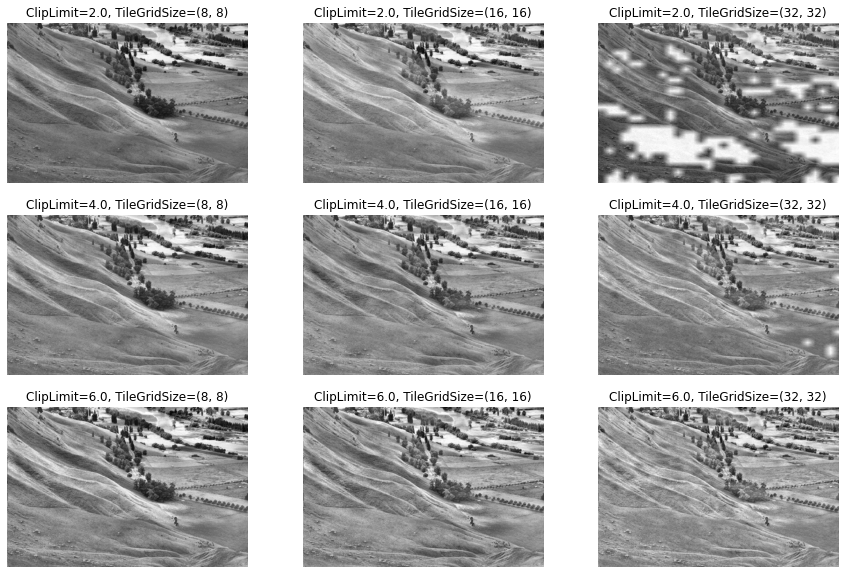

In [27]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Charger l'image de test
path =r"C:\Users\Dell\TP Traitement Image\vallee.png"
img = cv.imread(path)

# Convertir l'image en niveaux de gris
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Paramètres à ajuster
clipLimits = [2.0, 4.0, 6.0]
tileGridSizes = [(8, 8), (16, 16), (32, 32)]

# Affichage des résultats pour différents réglages des paramètres
plt.figure(figsize=(15, 10))
for i, clipLimit in enumerate(clipLimits):
    for j, tileSize in enumerate(tileGridSizes):
        # Créer un objet CLAHE avec les paramètres spécifiés
        clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileSize)
        # Appliquer CLAHE à l'image en niveaux de gris
        cl1 = clahe.apply(grayimg)
        # Afficher l'image égalisée avec CLAHE
        plt.subplot(len(clipLimits), len(tileGridSizes), i * len(tileGridSizes) + j + 1)
        plt.imshow(cl1, cmap="gray")
        plt.axis('off')
        plt.title(f'ClipLimit={clipLimit}, TileGridSize={tileSize}')

plt.show()
